In [1]:
import numpy as np
from numpy.linalg import multi_dot
from numpy.linalg import qr
import numpy.linalg as npla
import scipy as sp
from scipy.linalg import block_diag, logm, eigvals
import pandas as pd
import joblib
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern"
})

In [2]:
data_one = joblib.load('113_width4_length1e6.pkl')
data_two = joblib.load('113_width8_length1e6.pkl')
data_three = joblib.load('1028_width64_length1e6.pkl')
data_four = joblib.load('1120_width8_length1e6.pkl')
thetacrit = np.pi/4
theta_num = 15
strip_width_one = 4
strip_width_two = 8
strip_width_three = 64
l = int(1e6)
theta_vals = np.linspace(thetacrit,1.5,15)
theta_vals_three = [thetacrit + i*np.pi/1024 for i in range(16)]
np_data_one = np.array(data_one)
np_data_two = np.array(data_two)
np_data_three = np.array(data_three)
np_data_four = np.array(data_four)
np_data_one = np.reshape(np_data_one,(theta_num,int(len(np_data_one)/theta_num)))
np_data_two = np.reshape(np_data_two,(theta_num,int(len(np_data_two)/theta_num)))
np_data_four = np.reshape(np_data_four,(theta_num,int(len(np_data_four)/theta_num)))
np_data_three = np.reshape(np_data_three,(16,int(len(np_data_three)/16)))

In [3]:
np_data_three.shape

(16, 64)

In [4]:
min_val_one = [np_data_one[i,int((strip_width_one/2) -1)] for i in range(theta_num)]
min_val_two = [np_data_two[i,int((strip_width_two/2) -1)] for i in range(theta_num)]
min_val_three = [np_data_three[i,int((strip_width_three/2) -1)] for i in range(16)]
min_val_four = [np_data_four[i,int((strip_width_two/2) -1)] for i in range(theta_num)]
def fit(x,a,nu,b):
    return a*(x**nu)+b
params1, covar1 = curve_fit(fit,[i for i in range(theta_num)],min_val_one)
params2, covar2 = curve_fit(fit,[i for i in range(theta_num)],min_val_two)
params_list_one = [round(i,2) for i in params1]
params_list_two = [round(i,2) for i in params1]

params4, covar4 = curve_fit(fit,[i for i in range(theta_num)],min_val_four)
params_list_four = [round(i,2) for i in params4]

params3, covar3 = curve_fit(fit,[i for i in range(16)],min_val_three)
params_list_three = [round(i,2) for i in params3]

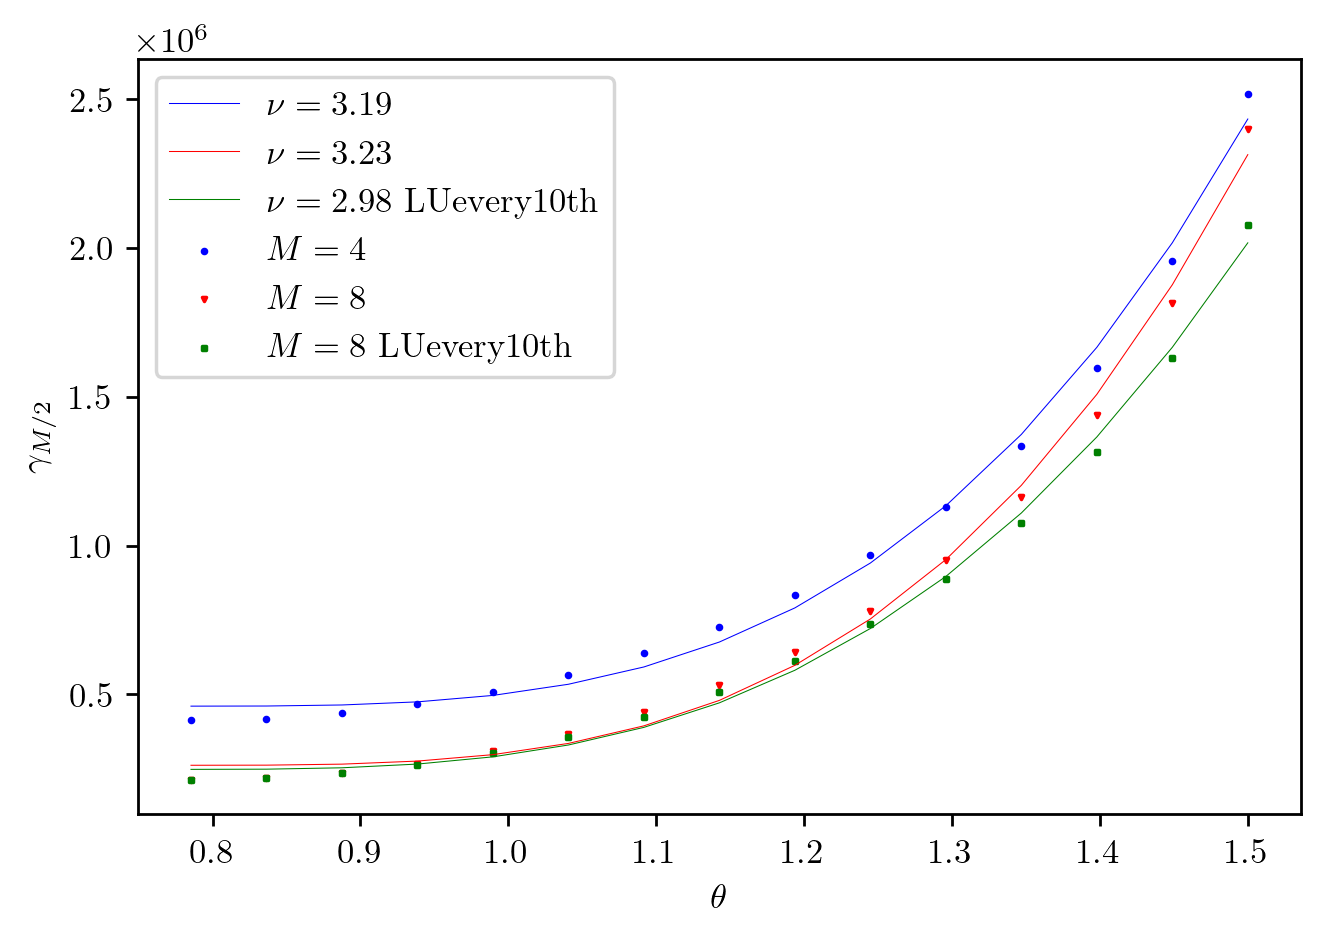

In [5]:
plt.figure(dpi = 250)

plt.scatter([i for i in theta_vals], min_val_one, s = 1.4, c = 'blue', label = r'$M = %s$'%(strip_width_one))
plt.plot([i for i in theta_vals],fit([i for i in range(theta_num)],*params1), 
         lw = 0.3, c = 'blue', label = r'$\nu = %s$'%(round(params1[1],2)))

plt.scatter([i for i in theta_vals], min_val_two, s = 1.4, c = 'red',label = r'$M = %s$'%(strip_width_two), marker = 'v')
plt.plot([i for i in theta_vals],fit([i for i in range(theta_num)],*params2), 
         lw = 0.3, c = 'red', label = r'$\nu = %s$'%(round(params2[1],2)))

plt.scatter([i for i in theta_vals], min_val_four, s = 1.4, c = 'green',label = r'$M = %s$ LUevery10th'%(strip_width_two), marker = 's')
plt.plot([i for i in theta_vals],fit([i for i in range(theta_num)],*params4), 
         lw = 0.3, c = 'green', label = r'$\nu = %s$ LUevery10th'%(round(params4[1],2)))
plt.legend()
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\gamma_{M/2}$')
plt.show()

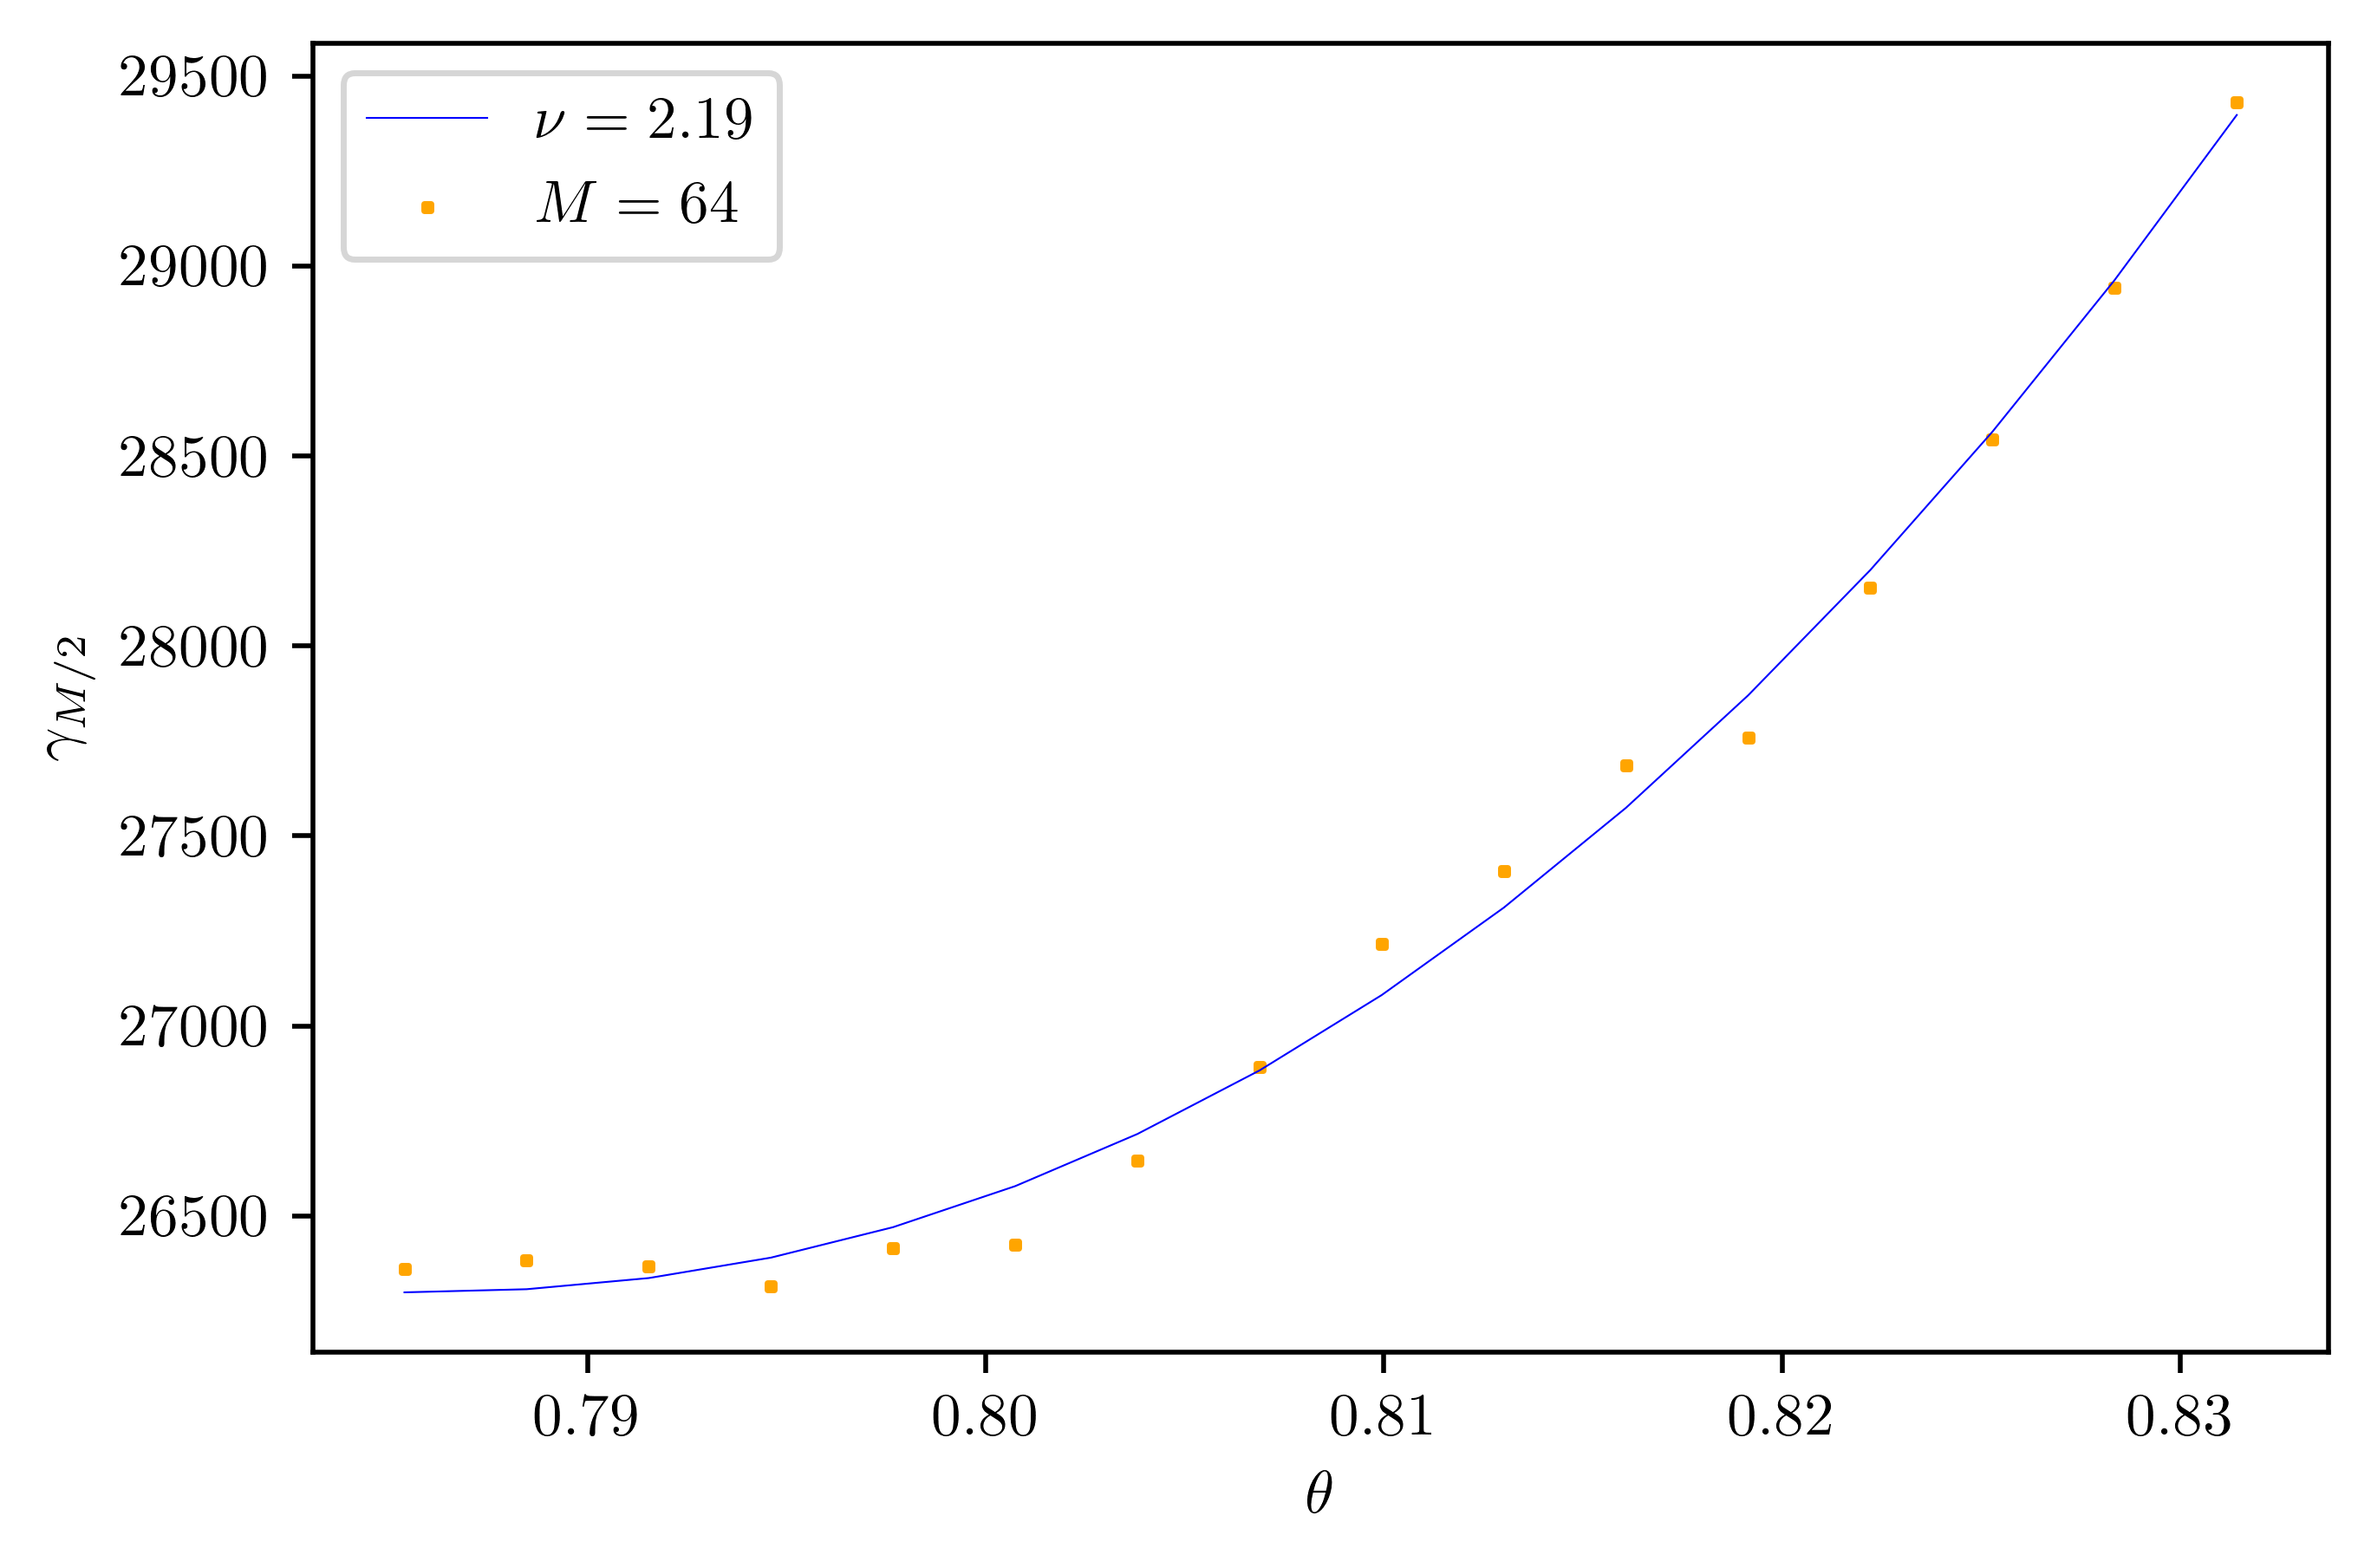

In [10]:
plt.figure(dpi = 500/2)
plt.scatter([i for i in theta_vals_three], min_val_three, s = 1.4, c = 'orange',label = r'$M = %s$'%(strip_width_three), marker = 's')
plt.plot([i for i in theta_vals_three],fit([i for i in range(16)],*params3), 
         lw = 0.3, c = 'blue', label = r'$\nu = %s$'%(round(params3[1],2)))

plt.legend()
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\gamma_{M/2}$')
#plt.savefig('CCMnu.pdf')
plt.show()


In [28]:
def xi(l,gamma):
    return ((1/(2*l))*gamma)**(-1)

Text(0, 0.5, '$\\Lambda_M(\\theta)$')

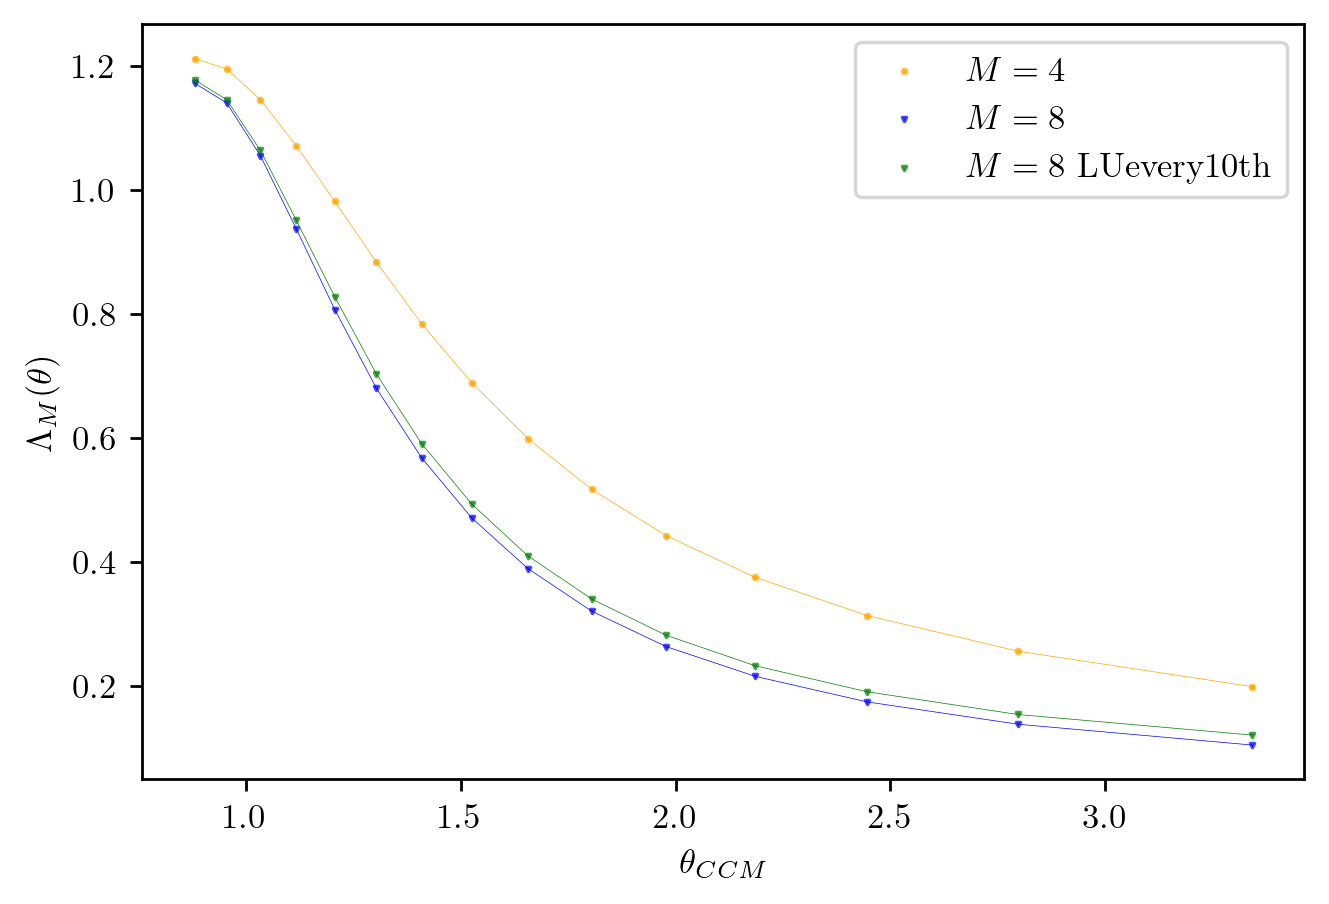

In [30]:

plt.figure(dpi = 250)
size = 1.4
plt.scatter([np.arctanh(np.sin(i)) for i in theta_vals],[xi(l,i)/(strip_width_one) for i in min_val_one], 
            s = size, label = r'$M = %s$'%(strip_width_one), c = 'orange', alpha = 0.7)
plt.plot([np.arctanh(np.sin(i)) for i in theta_vals],[xi(l,i)/(strip_width_one) for i in min_val_one],
         c = 'orange', lw = 0.2)
plt.scatter([np.arctanh(np.sin(i)) for i in theta_vals],[xi(l,i)/(strip_width_two) for i in min_val_two], 
            s = size,label = r'$M = %s$'%(strip_width_two), c = 'blue', marker = 'v', alpha = 0.7)
plt.plot([np.arctanh(np.sin(i)) for i in theta_vals],[xi(l,i)/(strip_width_two) for i in min_val_two],
        c = 'blue', lw = 0.2)
plt.scatter([np.arctanh(np.sin(i)) for i in theta_vals],[xi(l,i)/(strip_width_two) for i in min_val_four], 
            s = size,label = r'$M = %s$ LUevery10th'%(strip_width_two), c = 'green', marker = 'v', alpha = 0.7)
plt.plot([np.arctanh(np.sin(i)) for i in theta_vals],[xi(l,i)/(strip_width_two) for i in min_val_four],
        c = 'green', lw = 0.2)
plt.legend()
plt.xlabel(r'$\theta_{CCM}$')
plt.ylabel(r'$\Lambda_M(\theta)$')
#plt.savefig('deliverable1Lambda.png')

In [33]:
#Gaussian plots

def gauss(x,a,b,c):
    return a*np.exp((-(x-b)**2)/(2*c**2))
gaussian_data = joblib.load('gaussian_eigs_len100_width32.pkl')


(array([10.,  8.,  5.,  5.,  4.,  4.,  5.,  6.,  7., 10.]),
 array([-97.35083956, -77.90830583, -58.4657721 , -39.02323837,
        -19.58070464,  -0.13817091,  19.30436282,  38.74689655,
         58.18943028,  77.63196401,  97.07449774]),
 <BarContainer object of 10 artists>)

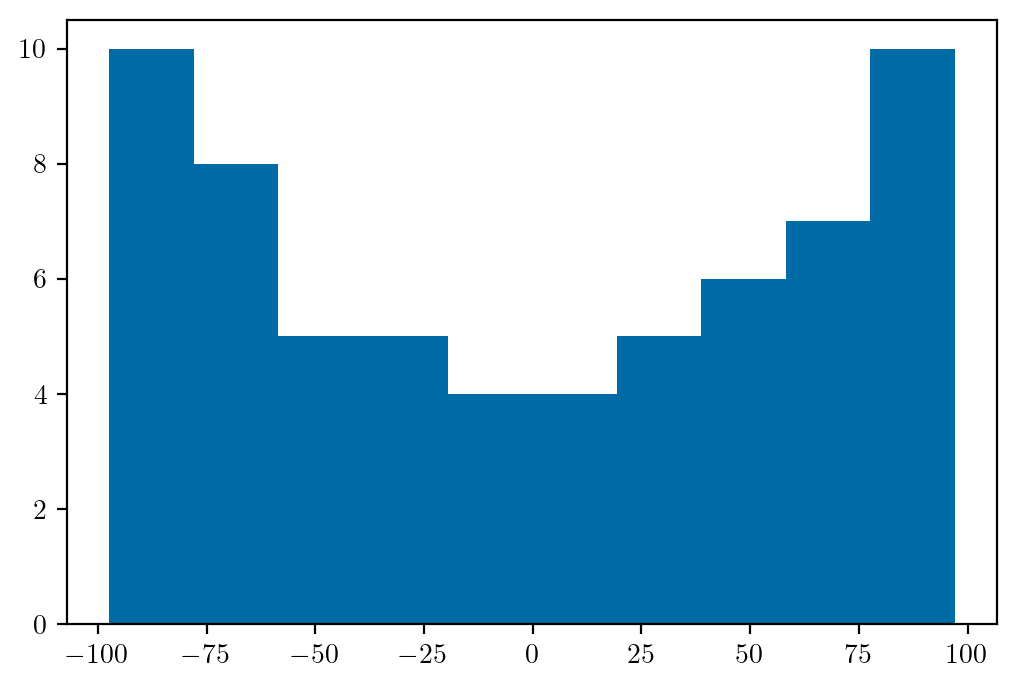

In [35]:
plt.figure(dpi = 200)
plt.hist(gaussian_data)

In [36]:
gaussian_data

[array([ 96.01708838,  97.07449774,  92.49906128,  91.44308472,
         90.06241139,  87.22876914,  81.45168511,  82.23624867,
         78.40100037,  80.18323872,  72.58572459,  77.2317275 ,
         71.21837852,  75.18853174,  63.02552268,  70.17098356,
         54.83702764,  63.78666996,  52.31278915,  57.35529289,
         44.55023096,  51.08293048,  38.42094568,  42.22744052,
         29.85540585,  33.97587516,  19.3794039 ,  25.7820548 ,
         13.37389507,  16.52505829,   3.13718178,   5.70398293,
         -4.65547648,  -0.5240354 , -17.67357739, -12.57715013,
        -27.60773829, -20.211081  , -36.22589501, -30.91215151,
        -45.35648064, -36.82263102, -51.1226589 , -45.53378801,
        -59.53230249, -51.25990951, -63.46898372, -57.27484435,
        -70.20565297, -62.08870387, -71.58962588, -70.00289422,
        -75.60656046, -73.96464759, -79.17170247, -77.99866413,
        -82.04581572, -81.25358182, -86.97145829, -88.24954759,
        -91.58717781, -93.50241083, -95.